## The Objectives of this project:


1.   Check for missing values & make decision on how to handle them.
2.   What is the distribution of age among patients with and without death events?


1.   What is the gender distribution in the dataset? Does gender impact the likelihood of a death event?
2.   What are the average serum creatinine and serum sodium levels, & how do they differ between those who experience a death event & those who did not?


1.   Do patients with high blood pressure have a higher mortality rate?
2.   Is smoking associated with high chances of death in heart failure patients?


1.   What's the average time (follow-up period) for patients who died compared to those who survived?












In [1]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning

### Read in file as dataframe

In [2]:
df = pd.read_csv('/content/cleaned_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Yes,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Yes,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Yes,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Yes,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,No,No,8,Yes


### Checking & Handling Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


In [4]:
# checking for missing values

df.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [5]:
# convert float data type to int

df['age'] = df['age'].astype('int')
df['age']

,age
0,75
1,55
2,65
3,50
4,65
...,...
294,62
295,55
296,45
297,45


### What is the distribution of age among patients with & without death events?

In [6]:
# filter out dead people and from that data we will look for their ages

death_events = df[df['DEATH_EVENT'] == 'Yes']
death_events['age'].describe()

,age
count,96.000000
mean,65.208333
std,13.217147
min,42.000000
25%,55.000000
50%,65.000000
75%,75.000000
max,95.000000


###

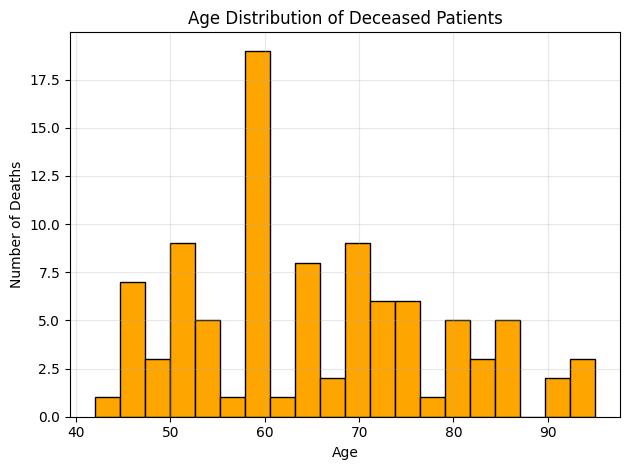

In [7]:
# visualizing distribution through a histogram

ax = death_events['age'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Deaths')  # counts per bin
ax.set_title('Age Distribution of Deceased Patients')
plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


In [8]:
# filter out dead people and from that data we will look for their ages

no_death_events = df[df['DEATH_EVENT'] == 'No']
no_death_events['age'].describe()

,age
count,203.000000
mean,58.758621
std,10.637402
min,40.000000
25%,50.000000
50%,60.000000
75%,65.000000
max,90.000000


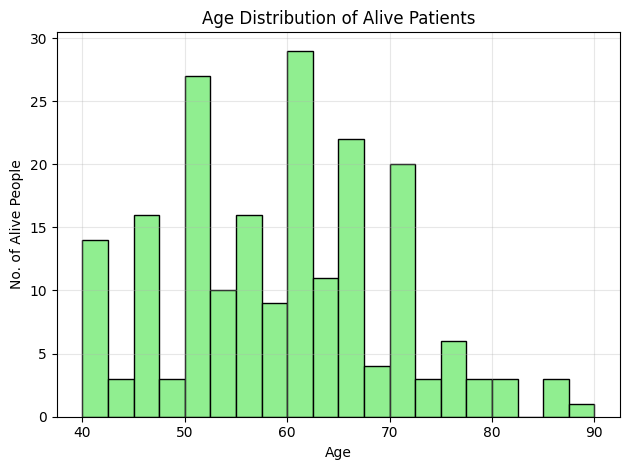

In [9]:
# visualizing distribution through a histogram

ax = no_death_events['age'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
ax.set_xlabel('Age')
ax.set_ylabel('No. of Alive People')  # counts per bin
ax.set_title('Age Distribution of Alive Patients')
plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


### What is the gender distribution in the dataset?

In [10]:
# percent of each gender in our dataset

# dataset uses 1=Male, 0=Female

map_sex = {'Yes': 'Male', 'No': 'Female', 1: 'Male', 0: 'Female', '1': 'Male', '0': 'Female'}

df['sex'] = df['sex'].map(map_sex).fillna(df['sex'])

# (Optional) make it a tidy categorical with a nice order
df['sex'] = pd.Categorical(df['sex'], categories=['Female', 'Male'], ordered=True)



out = (df['sex']
       .value_counts(normalize=True)
       .mul(100).round(1)
       .rename('percent')
       .to_frame()
       .reset_index()
       .rename(columns={'index': 'sex'}))
print(out)


      sex  percent
0    Male     64.9
1  Female     35.1


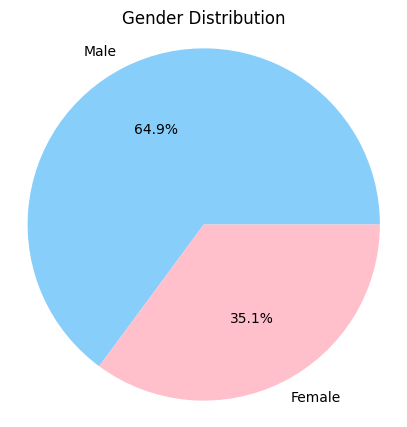

In [11]:
# visualize distribution using pie chart

plt.figure(figsize=(5,5))
df['sex'].value_counts().plot(kind='pie', autopct='%.1f%%', ylabel='', colors = ['lightskyblue', 'pink'], title='Gender Distribution')
plt.axis('equal'); plt.show()

### Does Gender impact the likelihood of death event?

In [12]:
# group by gender & calculate death rate

# map death events to 1/0 (Yes=1, No=0)
df['DEATH_EVENT_NUM'] = df['DEATH_EVENT'].map({'Yes': 1, 'No': 0})

# group by gender and calculate death rate
gender_death_rate = (
    df.groupby('sex', observed=True)['DEATH_EVENT_NUM']
      .mean()
      .mul(100)     # convert to %
      .round(1)     # nicer display
)

print(gender_death_rate)


sex
Female    32.4
Male      32.0
Name: DEATH_EVENT_NUM, dtype: float64


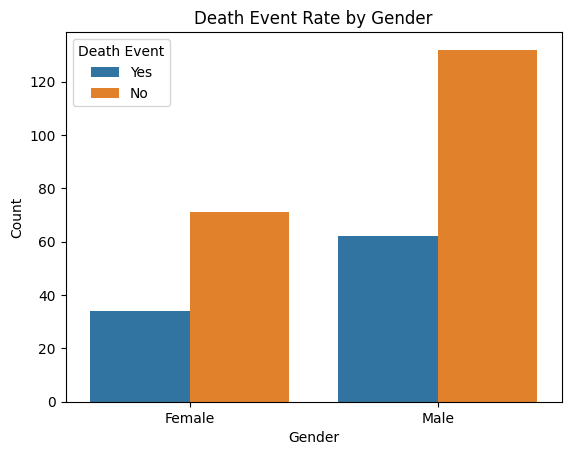

In [13]:
sns.countplot(x='sex', data=df, hue='DEATH_EVENT')

plt.title('Death Event Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Death Event')
plt.show()

In [14]:
# If p < 0.05 ; the diiference in death rates between genders is statistically significant; done to be sure

significant_value = 0.05


from scipy.stats import chi2_contingency        # Run the chi-square test of independence

tab = pd.crosstab(df['sex'], df['DEATH_EVENT'])  # counts table
chi2, p, dof, exp = chi2_contingency(tab)

print(tab)
print(f"p-value: {p:.3f}")  # p < 0.05 suggests a meaningful association

if p < significant_value:
    print("The difference in death rates between genders is statistically significant.")
else:
    print("There is no statistically significant difference in death rates between genders.")


DEATH_EVENT   No  Yes
sex                  
Female        71   34
Male         132   62
p-value: 1.000
There is no statistically significant difference in death rates between genders.


### What are the average serum creatinine and serum sodium levels, & how do they differ between those who experience a death event & those who did not?

*  serum creatinine: mesure of kidney function (higher = worse)
*  serum sodium: lower values indicate poor heart function



In [15]:
# finding the average values for creatinine & serum level
df[['serum_creatinine', 'serum_sodium']].mean()



,0
serum_creatinine,1.393880
serum_sodium,136.625418


In [16]:
# grouping by event and finding the average values for creatinine & serum level

df.groupby('DEATH_EVENT')[['serum_creatinine', 'serum_sodium']].mean()

,serum_creatinine,serum_sodium
DEATH_EVENT,,
No,1.184877,137.216749
Yes,1.835833,135.375000


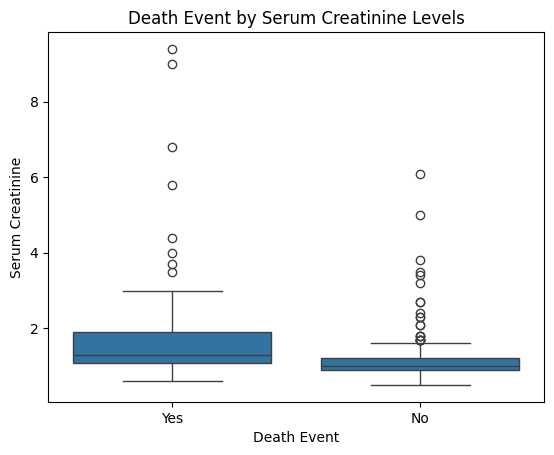

In [17]:
# Death Event by Serum Creatinine

sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Death Event by Serum Creatinine Levels')
plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine')
plt.show()


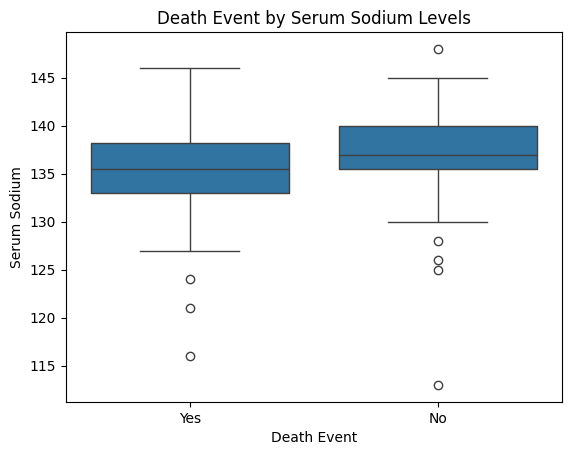

In [18]:
# Death Event by Serum Creatinine

sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df)
plt.title('Death Event by Serum Sodium Levels')
plt.xlabel('Death Event')
plt.ylabel('Serum Sodium')
plt.show()

### Do patients with high blood pressure have a higher mortality rate?



In [19]:
# Create a Cross Tab & count death events by BP

bp_death_counts = pd.crosstab(df['high_blood_pressure'], df['DEATH_EVENT'], margins = True)   # pd.crosstab() creates a cross-tabulation table; term for a table of counts
bp_death_counts

DEATH_EVENT,No,Yes,All
high_blood_pressure,,,
No,137,57,194
Yes,66,39,105
All,203,96,299


In [23]:
df.groupby('DEATH_EVENT')['high_blood_pressure'].value_counts(normalize=True).mul(100).round(1)       # normalize=True makes value_counts return proportions (not raw counts)

DEATH_EVENT  high_blood_pressure
No           No                     67.5
             Yes                    32.5
Yes          No                     59.4
             Yes                    40.6
Name: proportion, dtype: float64

In [26]:
significant_value = 0.05


from scipy.stats import chi2_contingency        # Run the chi-square test of independence

tab = pd.crosstab(df['DEATH_EVENT'], df['high_blood_pressure'])  # counts table
chi2, p, dof, exp = chi2_contingency(tab)

print(f"p-value: {p:.3f}")  # p < 0.05 suggests a meaningful association

if p < significant_value:
    print("There is statistically significant association.")
else:
    print("There is no statistically significant association.")


p-value: 0.214
There is no statistically significant association.


### Is smoking associated with high chances of death in heart failure patients?

In [27]:
smk_death_counts = pd.crosstab(df['smoking'], df['DEATH_EVENT'], margins = True)   # pd.crosstab() creates a cross-tabulation table; term for a table of counts
smk_death_counts

DEATH_EVENT,No,Yes,All
smoking,,,
No,137,66,203
Yes,66,30,96
All,203,96,299


In [29]:
df.groupby('DEATH_EVENT')['smoking'].value_counts(normalize=True).mul(100).round(1)

DEATH_EVENT  smoking
No           No         67.5
             Yes        32.5
Yes          No         68.8
             Yes        31.2
Name: proportion, dtype: float64

In [30]:
significant_value = 0.05


from scipy.stats import chi2_contingency        # Run the chi-square test of independence

tab = pd.crosstab(df['DEATH_EVENT'], df['smoking'])  # counts table
chi2, p, dof, exp = chi2_contingency(tab)

print(f"p-value: {p:.3f}")  # p < 0.05 suggests a meaningful association

if p < significant_value:
    print("There is statistically significant association.")
else:
    print("There is no statistically significant association.")


p-value: 0.932
There is no statistically significant association.


### What's the average time (follow-up period) for patients who died compared to those who survived?

In [31]:
df.groupby('DEATH_EVENT')['time'].mean()

,time
DEATH_EVENT,
No,158.339901
Yes,70.885417


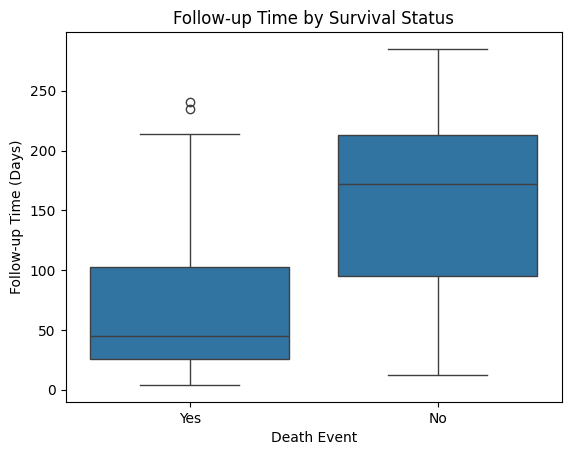

In [34]:
sns.boxplot(x='DEATH_EVENT', y='time', data=df)
plt.title('Follow-up Time by Survival Status')
plt.xlabel('Death Event')
plt.ylabel('Follow-up Time (Days)')
plt.show()

###